# Portfilio-Exam

# TASK 1 - Story

I'm a data scientist working for a large e-commerce company that is looking to expand into the Southeast Asian market, specifically Thailand. As part of this expansion, the company is interested in learning more about the social media behavior of Thai consumers and how they interact with retail sellers on Facebook.

The data science department has the mission to gain insights into which types of posts and engagement metrics are most effective for driving customer engagement for Thai fashion and cosmetics retail sellers.

By gaining a better understanding of the social media behavior of Thai consumers and how they interact with retail sellers on Facebook, the company wants to develop a more targeted and effective social media strategy for its expansion to Thailand.

# Task 2 - The Data

To achieve a better understanding of the social media behavior of Thai consumer, we plan to perform clustering analysis on a data frame that contains Facebook engagement metrics for 10 Thai fashion and cosmetics retail sellers.


The data frame includes the following engagement metrics:
- num_reactions: Number of reactions to a post generated. 
- num_comments:	Number of comments a post.
- num_shares: How often the post been shared.
- num_likes: Number of like the post has received.
- num_loves: Number of reactions with a heart icon. 
- num_wows:	 Number of reactions with a surprised face icon.
- num_hahas: Number of laughing face icons. 
- num_sads:	Number of sad face icons the post has received. 
- num_angrys:	Number of angry face icons the post has received. 

Further, the data frame includes information about the type of the post (column 'status_type'). There are four different types of posts:
- video
- photo
- link
- status

There is also a column status_published which gives us information about the time (mm/dd/yyyy HH:MM) when the post was published. 

Each instance represents one post, and is uniquely identifiable by the column status_id. 


In [1]:
# Imports 
import numpy as np # handle arrays/vectors
import matplotlib.pyplot as plt # plot
import pandas as pd
import matplotlib.cm as cm
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from datetime import datetime
from sklearn.cluster import KMeans  # K-Means
from sklearn.cluster import MiniBatchKMeans # A sometimes faster version of k-Means
from sklearn.preprocessing import MinMaxScaler, StandardScaler# import the Scalers
from sklearn import metrics
from sklearn.feature_selection import VarianceThreshold
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA 

from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import OPTICS, cluster_optics_dbscan

from yellowbrick.cluster import SilhouetteVisualizer #for visulaizing the silhouette coefficients and scores
from yellowbrick.datasets import load_nfl
from sklearn.metrics import pairwise_distances

In [2]:
df = pd.read_csv(r'Dataset\Live_20210128.csv')
df.head(10)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
5,6,photo,4/18/2018 2:14,217,6,0,211,5,1,0,0,0,NaN,NaN,NaN,NaN
6,7,video,4/18/2018 0:24,503,614,72,418,70,10,2,0,3,NaN,NaN,NaN,NaN
7,8,video,4/17/2018 7:42,295,453,53,260,32,1,1,0,1,NaN,NaN,NaN,NaN
8,9,photo,4/17/2018 3:33,203,1,0,198,5,0,0,0,0,NaN,NaN,NaN,NaN
9,10,photo,4/11/2018 4:53,170,9,1,167,3,0,0,0,0,NaN,NaN,NaN,NaN


Source of the Dataset: https://archive-beta.ics.uci.edu/dataset/488/facebook+live+sellers+in+thailand , Date: 17.04.2023

Licence: CC BY 4.0 (his allows for the sharing and adaptation of the datasets for any purpose, provided that the appropriate credit is given.)

In [3]:
# Define a function to do initial data analysis
def initial_data_analysis(df,name):
    """
    Gives information about the dataframe for a quick overview.
    Args:
        df (pandas.DataFrame): The dataframe to be analysed.
        name (str): The name of the dataframe.
    Returns:
        None
    """
    print(f'Initial data analysis for {name}:\n')
    print(f'Shape: {df.shape}\n')
    column_name = []
    dtype = []
    count = []
    unique = []
    missing_values = []
    # create a list of column names, data types, number of non-null values, number of unique values and number of missing values
    for column in df.columns:
        column_name.append(column)
        dtype.append(df[column].dtype)
        count.append(len(df[column]))
        unique.append(len(df[column].unique()))
        missing_values.append(df[column].isna().sum())
    # create a dataframe consisting of the lists
    overview_values = pd.DataFrame({'column_name': column_name,'dtype': dtype,'count': count,'unique': unique,'missing_values': missing_values})
    display(overview_values)
    # sum up all the values in missing_values to get the total number of missing values
    missing_val  =  sum(missing_values) #Sum of missing values
    print(f'Sum of missing values: {missing_val}\n') 
    total_cells = np.product(df.shape) # get total number of values in the dataframe
    print(f'Percentage of null values: {missing_val/total_cells*100:.2f}%\n') 
    
    print('Head:')
    display( df.head())

    # get descriptive statistics for the numerical columns
    print('Discribe:')
    display(df.describe().round(2)) 
    print(' ') # do a linebreak

In [4]:
initial_data_analysis(df,'Facebook Live Sellers')

Initial data analysis for Facebook Live Sellers:

Shape: (7050, 16)



,column_name,dtype,count,unique,missing_values
0,status_id,int64,7050,7050,0
1,status_type,object,7050,4,0
2,status_published,object,7050,6913,0
3,num_reactions,int64,7050,1067,0
4,num_comments,int64,7050,993,0
5,num_shares,int64,7050,501,0
6,num_likes,int64,7050,1044,0
7,num_loves,int64,7050,229,0
8,num_wows,int64,7050,65,0
9,num_hahas,int64,7050,42,0


Sum of missing values: 28200

Percentage of null values: 25.00%

Head:


,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


Discribe:


,status_id,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
count,7050.00,7050.00,7050.00,7050.00,7050.00,7050.00,7050.00,7050.00,7050.00,7050.00,0.0,0.0,0.0,0.0
mean,3525.50,230.12,224.36,40.02,215.04,12.73,1.29,0.70,0.24,0.11,NaN,NaN,NaN,NaN
std,2035.30,462.63,889.64,131.60,449.47,39.97,8.72,3.96,1.60,0.73,NaN,NaN,NaN,NaN
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN
25%,1763.25,17.00,0.00,0.00,17.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN
50%,3525.50,59.50,4.00,0.00,58.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN
75%,5287.75,219.00,23.00,4.00,184.75,3.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN
max,7050.00,4710.00,20990.00,3424.00,4710.00,657.00,278.00,157.00,51.00,31.00,NaN,NaN,NaN,NaN


## Task 4 – EDA, Preprocessing

In [5]:
# drop Column 'Column1', 'Column2', 'Column3', 'Column4' because they contain only NaN
df = df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1)

In [6]:
# get unique values of the column 'status_type'
print(df['status_type'].unique())
# turn status_type to numerical values so we can run k-Means and DBSCAN 
df['status_type'] = df['status_type'].map({'video': 0, 'photo': 1, 'link': 2, 'status': 3})


['video' 'photo' 'link' 'status']


Assigned the number 0 to video, 1 to photo, 2 to link and 3 to status.

Now it's possible to use this column for clustering algorithms.

In [7]:
# Transform column status_published to datetime m/d/y h:m
df['status_published'] = pd.to_datetime(df['status_published'],format='%m/%d/%Y %H:%M')

# Convert the staus_publisches to Unix time
# Unix time is defined as the number of seconds that have elapsed since 00:00:00 Coordinated Universal Time (UTC), Thursday, 1 January 1970
df['status_published'] = df['status_published'].astype(np.int64) // 10**9


In [8]:
# set status_type as index
df = df.set_index('status_id')

In [9]:
# do the initial data analysis again with the cleaned data frame
initial_data_analysis(df,'Facebook Live Sellers')

Initial data analysis for Facebook Live Sellers:

Shape: (7050, 11)



,column_name,dtype,count,unique,missing_values
0,status_type,int64,7050,4,0
1,status_published,int64,7050,6913,0
2,num_reactions,int64,7050,1067,0
3,num_comments,int64,7050,993,0
4,num_shares,int64,7050,501,0
5,num_likes,int64,7050,1044,0
6,num_loves,int64,7050,229,0
7,num_wows,int64,7050,65,0
8,num_hahas,int64,7050,42,0
9,num_sads,int64,7050,24,0


Sum of missing values: 0

Percentage of null values: 0.00%

Head:


,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
status_id,,,,,,,,,,,
1,0,1524376800,529,512,262,432,92,3,1,1,0
2,1,1524350700,150,0,0,150,0,0,0,0,0
3,0,1524291420,227,236,57,204,21,1,1,0,0
4,1,1524277740,111,0,0,111,0,0,0,0,0
5,1,1524021720,213,0,0,204,9,0,0,0,0


Discribe:


,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.00,7.050000e+03,7050.00,7050.00,7050.00,7050.00,7050.00,7050.00,7050.00,7050.00,7050.00
mean,0.78,1.479619e+09,230.12,224.36,40.02,215.04,12.73,1.29,0.70,0.24,0.11
std,0.71,5.980788e+07,462.63,889.64,131.60,449.47,39.97,8.72,3.96,1.60,0.73
min,0.00,1.342321e+09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,1.458061e+09,17.00,0.00,0.00,17.00,0.00,0.00,0.00,0.00,0.00
50%,1.00,1.510968e+09,59.50,4.00,0.00,58.00,0.00,0.00,0.00,0.00,0.00
75%,1.00,1.520573e+09,219.00,23.00,4.00,184.75,3.00,0.00,0.00,0.00,0.00
max,3.00,1.528852e+09,4710.00,20990.00,3424.00,4710.00,657.00,278.00,157.00,51.00,31.00


## Task 5 - Clustering

## Scale the data

In [10]:
# Scale the data with MinMaxScaler
# Create a MaxMinScaler object
max_min_scaler = MinMaxScaler()
# Scale df_num and create a new pandas dataframe 
df_scaled = pd.DataFrame(max_min_scaler.fit_transform(df), columns=  df.columns)
df_scaled.describe().round(3)

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000,7050.000,7050.000,7050.000,7050.000,7050.000,7050.000,7050.000,7050.000,7050.000,7050.000
mean,0.260,0.736,0.049,0.011,0.012,0.046,0.019,0.005,0.004,0.005,0.004
std,0.236,0.321,0.098,0.042,0.038,0.095,0.061,0.031,0.025,0.031,0.023
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.620,0.004,0.000,0.000,0.004,0.000,0.000,0.000,0.000,0.000
50%,0.333,0.904,0.013,0.000,0.000,0.012,0.000,0.000,0.000,0.000,0.000
75%,0.333,0.956,0.046,0.001,0.001,0.039,0.005,0.000,0.000,0.000,0.000
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


### K-means++

In [11]:
def run_kmeans(df,k_min, k_max):
    '''
    Run k-Means++ with k = k_min to k=k_max and plot the silhouette scores.
    
    Parameters:
    df: pandas dataframe
    k_min: int, minimum number of clusters
    k_max: int, maximum number of clusters

    Returns: 
    fine_k_list: list, list of k values
    '''
    # Run k-Means with k = k_min to k=k_max and plot the silhouette scores
    k_values = range(k_min,k_max+1)
    max_silhouette_score = 0

    silhouette_scores =  []
    fine_k_list = []
    for k in k_values:
        # Instantiate the clustering model and visualizer
        kmeans_pp = KMeans(
            n_clusters = k,
            random_state = k,
            n_init = 20,
            init='k-means++',
            max_iter = 300,
            tol = 0.0001
        )
        # Fit the training data to the visualizer
        cluster_assignment = kmeans_pp.fit_predict(df)

        # Compute the mean Silhouette Coefficient / silhouette score
        silhouette_score =  metrics.silhouette_score(df,cluster_assignment, metric='euclidean')
        silhouette_scores.append(silhouette_score)     
        # Get maximum silhouette score
        if silhouette_score > max_silhouette_score:
            max_silhouette_score = silhouette_score
            max_k = k
        if silhouette_score >= 0.7:
            fine_k_list.append(k)

    # Plot the silhouette scores
    plt.plot(k_values, silhouette_scores)
    plt.title('Silhouette scores for k-Means++')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette score')
    plt.show()

    # Print silhouette score and k with the highest silhouette score
    print(f'The largest silhouette score of {round(max_silhouette_score,3)} we get for K-means++ with k={max_k}.') 
    return fine_k_list

In [12]:
# Def function to run k-Means and plot the silhouette scores
def run_kmeans_plot(df,k):
    '''
    Run k-Means++ with k = k.

    Parameters:
    df: pandas dataframe
    k: int, number of clusters

    Returns: 
    None

    '''
    # Run k-Means with k=2 to k=10 and plot the silhouette scores
    max_silhouette_score = 0
    # Instantiate the clustering model and visualizer
    kmeans_pp = KMeans(
        n_clusters = k,
        random_state = k,
        n_init = 20,
        init='k-means++',
        max_iter = 300,
        tol = 0.0001
    )
    visualizer = SilhouetteVisualizer(kmeans_pp, colors='yellowbrick')
    # Fit the data to the visualizer
    visualizer.fit(df)        
    sil_score = visualizer.silhouette_score_
    #print silhouette score
    print(f'For {k} clusters the silhouette score is {round(sil_score,3)}')
    # Show the plot
    visualizer.show()  

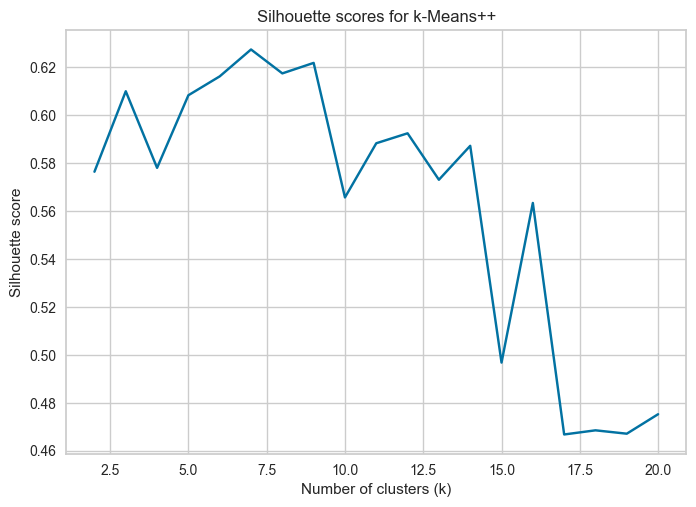

The largest silhouette score of 0.627 we get for K-means++ with k=7.


In [13]:
#Run k-Means with different values for k and plot the silhouette scores 
fine_k_list = run_kmeans(df = df_scaled, k_min=2,k_max=20)

In [14]:
# Print how many clusters have a silhouette score >= 0.7
print(f'We found {len(fine_k_list)} clusters with a silhouette score >= 0.7')

We found 0 clusters with a silhouette score >= 0.7


In [15]:
#Show silhouette plots for k-Means++ with silhouette score grather than 0.7
for k in fine_k_list:
    run_kmeans_plot(df = df_scaled, k=k)

I could not find a clustering with a silhouette score grater then 0.7, which indicates a strong structure. But there are some clusters with a silhouette score gater then 0.6 which leads not to a stong structure, but it could be used.
So in the following I'll have a closer the clustering with a silhouette score above 0.6.

For 3 clusters the silhouette score is 0.61


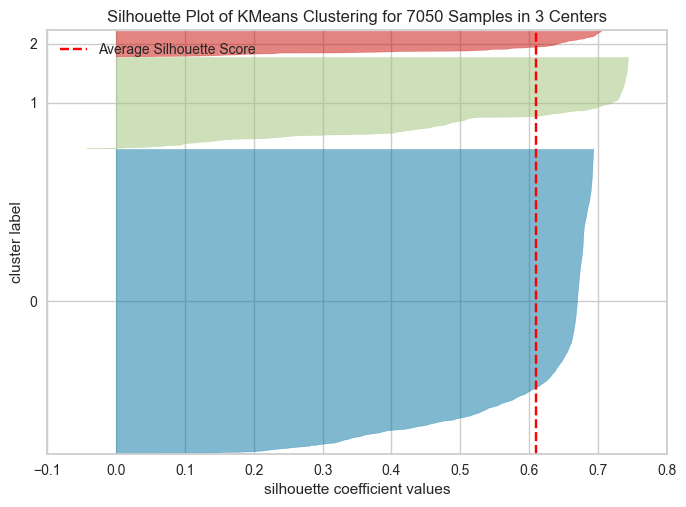

For 5 clusters the silhouette score is 0.608


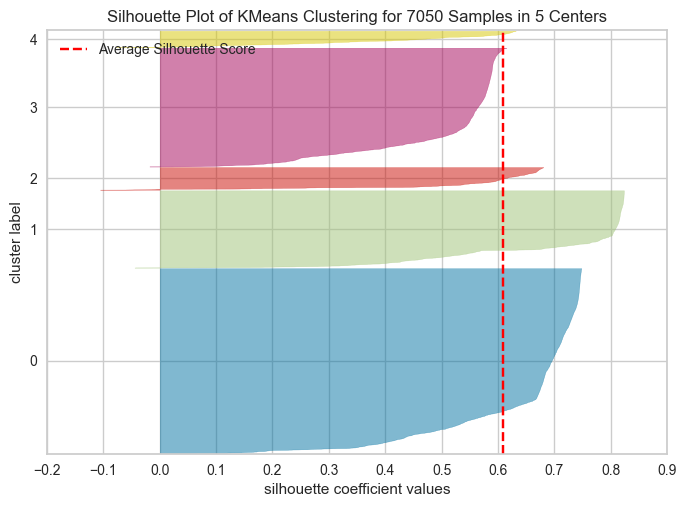

For 6 clusters the silhouette score is 0.616


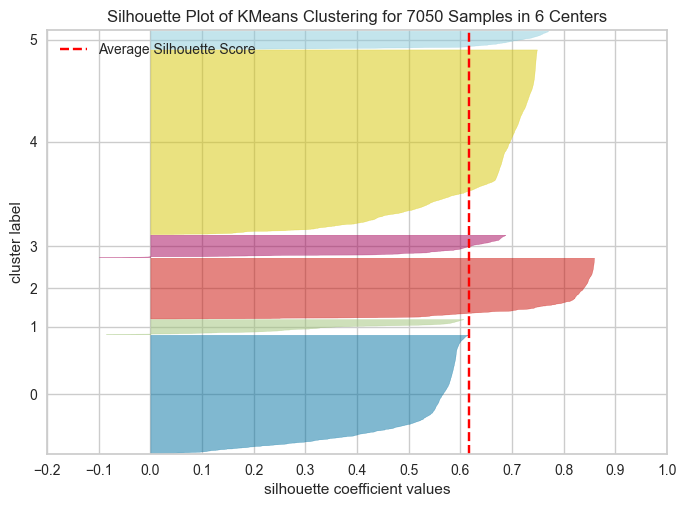

For 7 clusters the silhouette score is 0.627


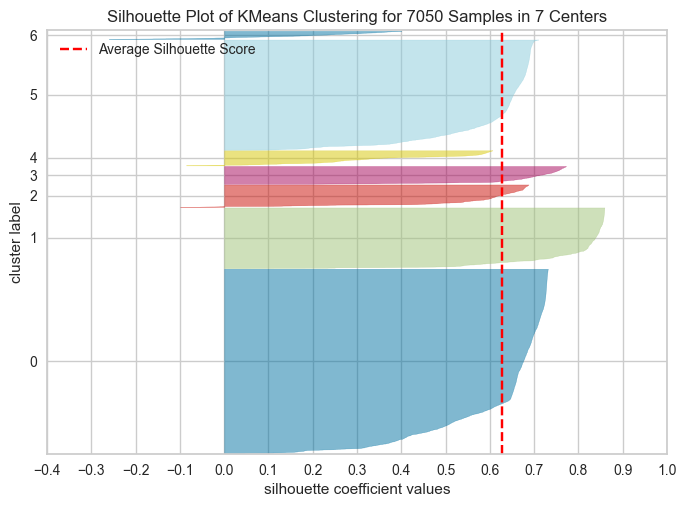

For 8 clusters the silhouette score is 0.617


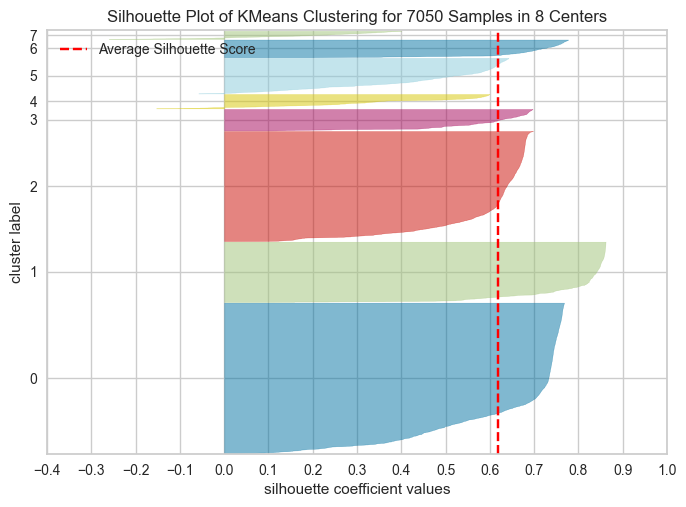

For 9 clusters the silhouette score is 0.622


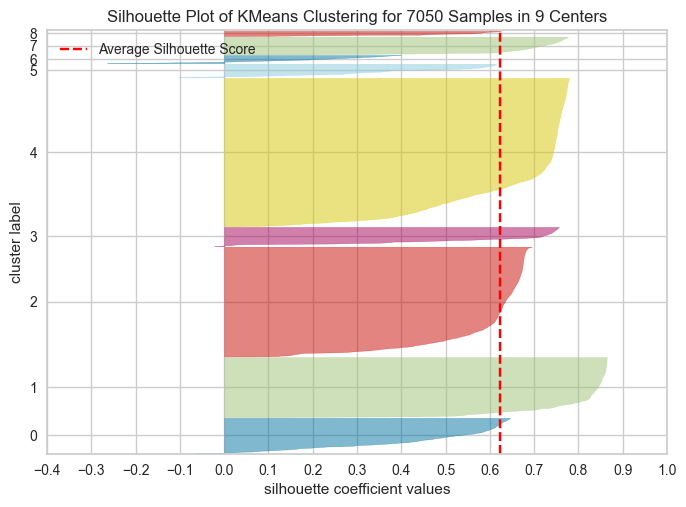

In [16]:
# Since we could find a cluster with a silhouette score >= 0.7, we'll look at some clusterings with a silhouette score >= 0.6
run_kmeans_plot(df = df_scaled, k=3)
run_kmeans_plot(df = df_scaled, k=5)
run_kmeans_plot(df = df_scaled, k=6)
run_kmeans_plot(df = df_scaled, k=7)
run_kmeans_plot(df = df_scaled, k=8)
run_kmeans_plot(df = df_scaled, k=9)

The clusters we get with k = 5,6,7,8,9 include some small clusters, that are probably not that significant. 

Whereby, the cluster with k = 3 have comparatively large clusters. Even if cluster 0 includes much more instances than cluster 1 and 2.

Therefor, I would choose the clustering with k = 3

# Do interpretation of  the silhouet plot!

### DBSCAN

Since we could not find any strong structure in the data with the K-means++ algorithm, we'll try the DBSCAN algorithm.

To cluster the data with DBSCAN algorithm, we need to find the optimal value for epsilon and min_samples
 
- Epsilon is the maximum distance between two samples, for one to be considered as in the neighborhood of the other.
- Min_samples is the number of samples in a neighborhood for a point to be considered as a core point.

We are going to compute the distance matrix with the Euclidean distance and by looking at the distance matrix we can find a good value for epsilon, using the elbow method.

In [17]:
# Compute the distance matrix and plot it
def compute_distance_matrix(df,k,eps=0):
    '''
    Compute the distance matrix for a given dataframe.
    
    Parameters:
    df: pandas dataframe
    k: int, number of nearest neighbors
    eps: float, epsilon value for DBSCAN
    '''
    neighbors = NearestNeighbors(n_neighbors=k) # Create a nearest neighbors instance
    nearest_neighbors = neighbors.fit(df) # Fit the instance to the data set
    distances,_ = nearest_neighbors.kneighbors(df)# distance to the k nearest neighbors

    # Plot the distances to the kth nearest neighbor
    distances = np.sort(distances[:,k-1], axis=0)
    plt.hlines(y=eps, xmin=0, xmax=len(distances), colors='r', linestyles='dashed')# add horizontal line at eps
    plt.xlabel(f'Points sorted according to distance of {k}th nearest neighbor')
    plt.ylabel(f'Distance to {k}th nearest neighbor')
    plt.title('Nearest Neighbors')
    plt.plot(distances)
    plt.show()

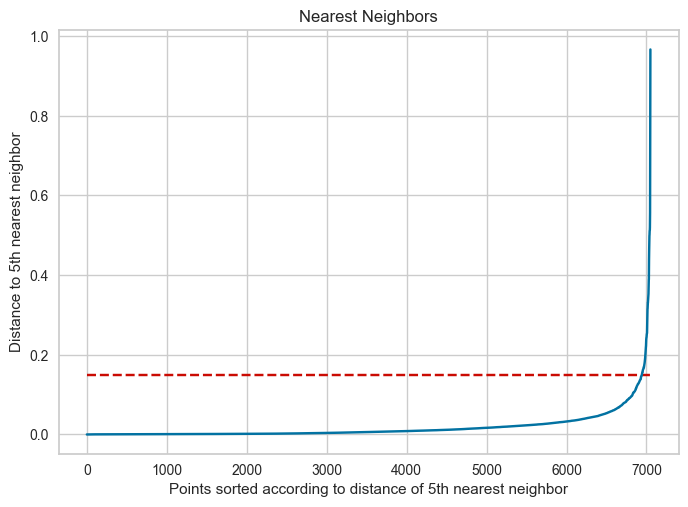

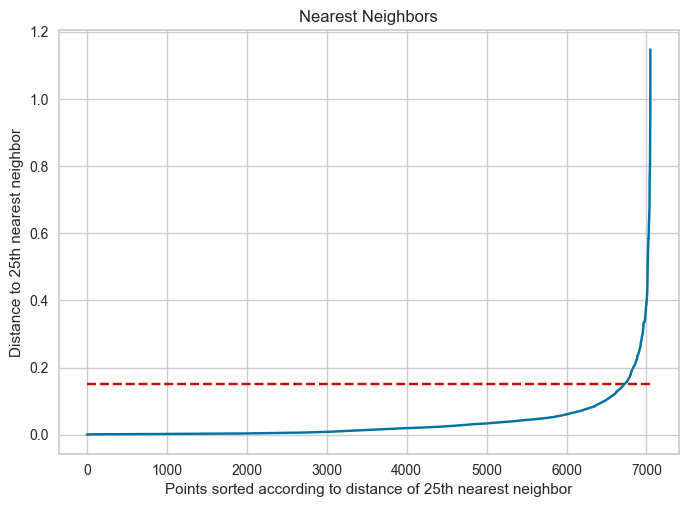

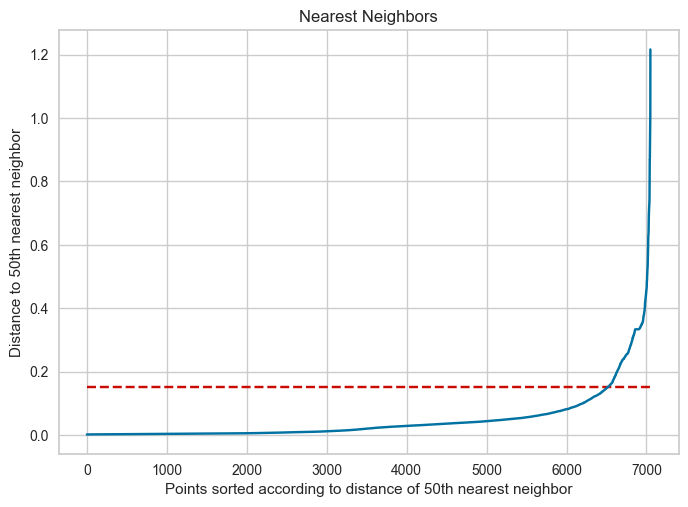

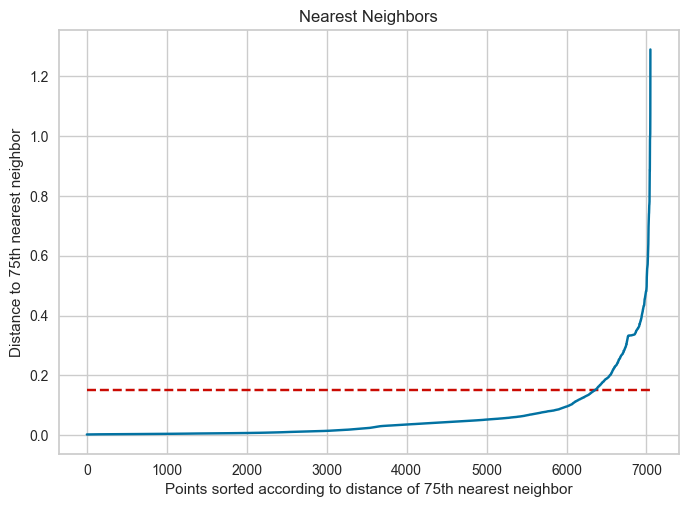

In [18]:
# Plot the distance matrix for different values of k
# k is the number of nearest neighbors to consider
# Note: eps does not influence the distance matrix, it's set afterwards to visualize the choice of epsilon
k_list = [5,25,50,75]
for k in k_list:  # Number of neighbors to consider
    compute_distance_matrix(df_scaled,k,eps=0.15)

In [19]:
# Run DBSCAN with diffrent values for min_samples and plot the silhouette scores
def dbscan_silhouette_score_plot(df,eps,min_samples_values):
    '''
    Run DBSCAN with different values for min_samples and plot the silhouette scores.

    Parameters:
    df: pandas dataframe
    eps: float, epsilon value for DBSCAN
    min_samples_values: list, values for min_samples
    
    Returns:
    fine_min_samples_list: list, values for min_samples with silhouette score grather than 0.7
    '''

    silhouette_scores = []
    fine_min_samples_list = []

    for min_samples  in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(df)
        labels = db.labels_
        # Calculate silhouette score
        sc = silhouette_score(df, labels)
        silhouette_scores.append(sc)
        if round(sc,2) >= 0.7:
            fine_min_samples_list.append(min_samples)

    # Plot the silhouette scores
    plt.plot(min_samples_values, silhouette_scores)
    plt.title(f'Silhouette scores DBSCAN with eps={eps}')
    plt.xlabel('Number of min_samples')
    plt.ylabel('Silhouette score')
    plt.show()
    return fine_min_samples_list

In [20]:
#Show silhouette plots for DBSCAN 
def dbscan_silhouette_plot(df,eps,min_samples):
    '''
    Run DBSCAN with different values for min_samples and plot the silhouette scores.
    
    Parameters:
    df: pandas dataframe
    eps: float, epsilon value for DBSCAN
    min_samples: int, value for min_samples
    Returns: None
    '''
    # Run DBSCAN clustering on the data
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan_labels = dbscan.fit_predict(df)

    # Calculate the silhouette score for this clustering
    score = silhouette_score(df, dbscan_labels)

    #Plot the silhouette scores for this clustering
    plt.figure()
    plt.title(f"DBSCAN clustering with eps={eps}, min_samples={min_samples}, silhouette score={score:.2f}")
    plt.xlabel("Silhouette coefficient values")
    plt.ylabel("Cluster label")

    silhouette_vals = silhouette_samples(df, dbscan_labels)
    y_ticks = []
    y_lower = y_upper = 0

    for i, cluster in enumerate(np.unique(dbscan_labels)):
        cluster_silhouette_vals = silhouette_vals[dbscan_labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1.0)
        y_ticks.append((y_lower + y_upper) / 2)
        y_lower = y_upper

    plt.axvline(x=score, color='red', linestyle='--')
    plt.yticks(y_ticks, np.unique(dbscan_labels))
    plt.show()


Looking at the shape of the data frame to see how many rows and columns it has. 

Because in the next step we try different values for min_samples, with values around 1% to 20% of the number of rows

In [21]:
df_scaled.shape

(7050, 11)

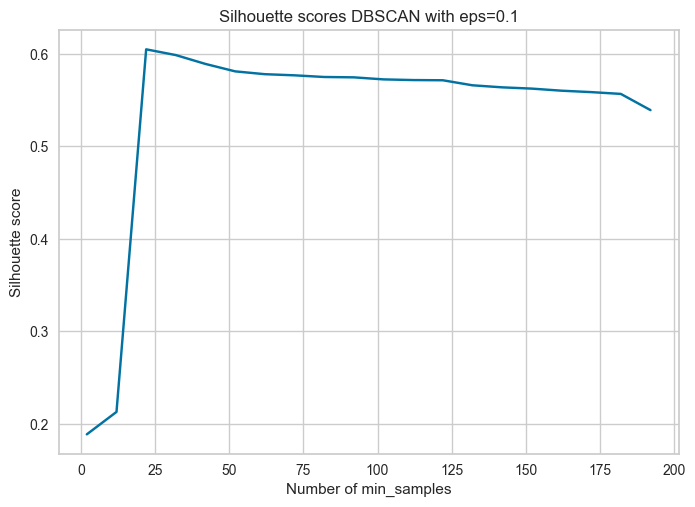

We found 0 clusters with a silhouette score >= 0.7, for eps = 0.1


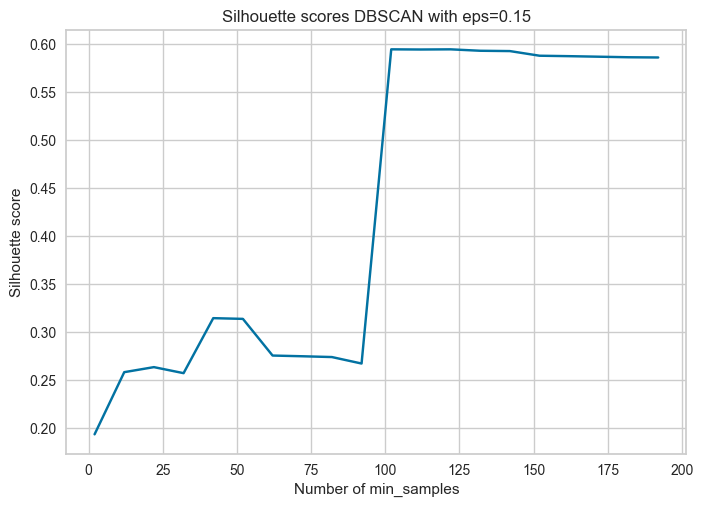

We found 0 clusters with a silhouette score >= 0.7, for eps = 0.15


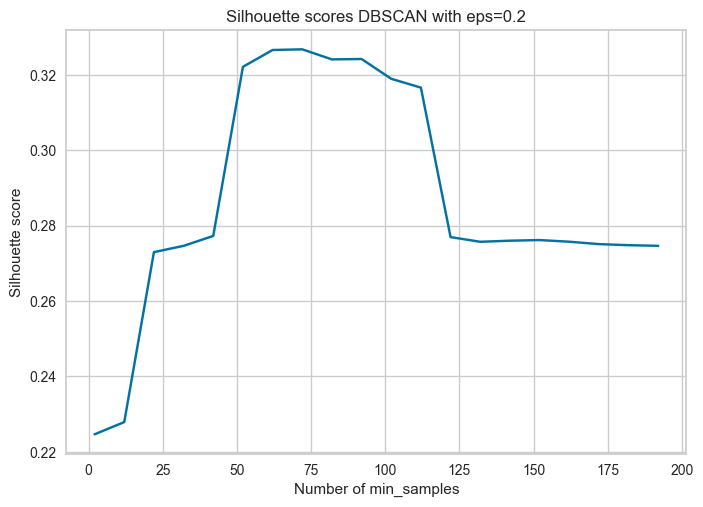

We found 0 clusters with a silhouette score >= 0.7, for eps = 0.2


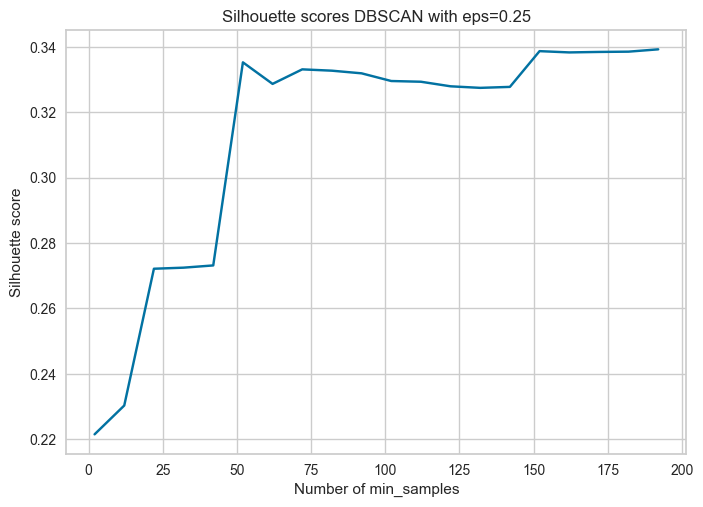

We found 0 clusters with a silhouette score >= 0.7, for eps = 0.25


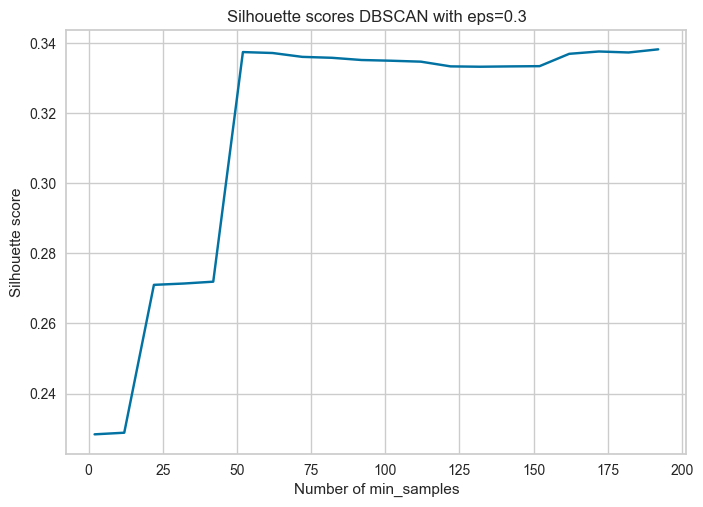

We found 0 clusters with a silhouette score >= 0.7, for eps = 0.3


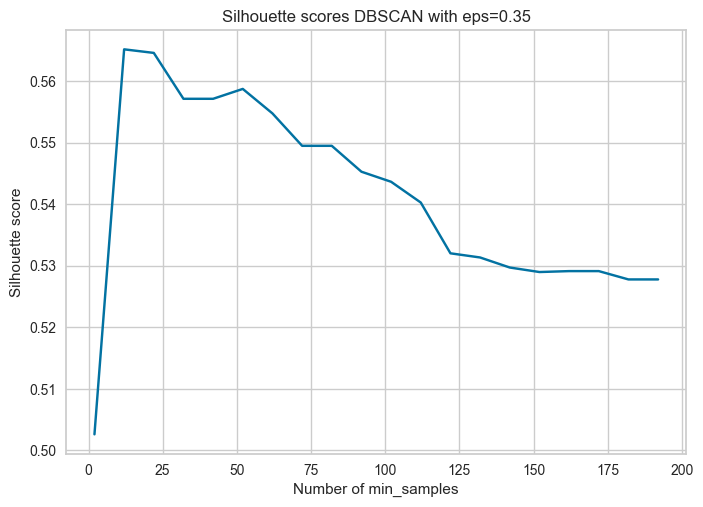

We found 0 clusters with a silhouette score >= 0.7, for eps = 0.35


In [22]:
# Try different values for epsilon using the elbow method, by looking at the plots above
eps_list = [0.1,0.15,0.2,0.25,0.3,0.35]
for eps in eps_list:
    min_samples_values = range(2,200,10) # choose some values, try values around 1% and 20% of the number of samples
    fine_min_samples_list = dbscan_silhouette_score_plot(df_scaled,eps,min_samples_values)
    
    # Print how many clusters have a silhouette score >= 0.7
    print(f'We found {len(fine_min_samples_list)} clusters with a silhouette score >= 0.7, for eps = {eps}') 
    
    # Show silhouette plots for DBSCAN with silhouette score grather than 0.7
    for min_samples in fine_min_samples_list:
        dbscan_silhouette_plot(df_scaled,eps,min_samples)

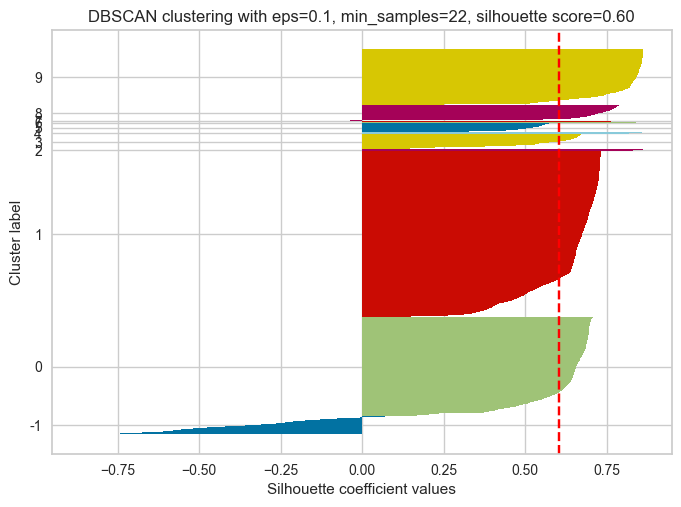

In [23]:
# A silhouette score of 0.6, we get for eps = 0.1 and  min_samples = 22
dbscan_silhouette_plot(df_scaled,eps=0.1,min_samples=22)

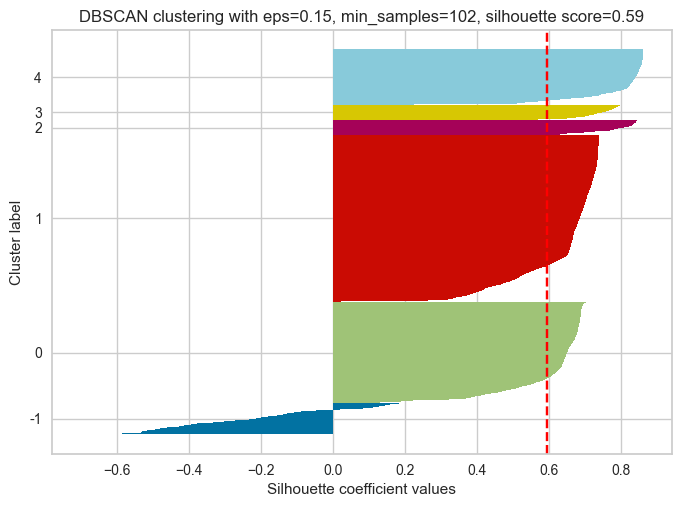

In [24]:
#Also a silhouette score close to 0.6, we get for eps = 0.15 and min_samples = 102
dbscan_silhouette_plot(df_scaled,eps=0.15,min_samples=102)

DBSCAN return 10 different clusters for eps = 0.1 and min_samples = 22 and for eps = 0.15 and min_samples = 102 DBSCAN returns 5 different clusters. 

Some of the clusters we get for eps = 0.1 and min_samples = 22, are very 'small' so they may not be that significant. So we would choose the clustering with eps = 0.15 and min_samples = 102.

By looking at the 4 clusters we can see that there are some instances that be considered as noise (cluster -1), but most of them have negative silhouette values, that means that they are probably not in the right cluster and probably no noise at all.

The number of instances of cluster 2 and 3 are quite small compared to cluster 0, 1 and 4.



With both Clustering Methods we couldn't find any strong structure (sC > 0.7), so we will try to use the Principal Component Analysis (PCA) to reduce the dimensionality of the data and then try to find stronger structures.
 

## Task 6 - Dimentionality Reduction

 The purpose of PCA is to transform the original high-dimensional data into a new, lower-dimensional space that captures the most important patterns and structures in the data.

In [25]:
# Covariance analysis to see if the features are related
df_scaled.cov().round(5)

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
status_type,0.05549,-0.00809,0.00037,-0.00254,-0.00285,0.00106,-0.00448,-0.00049,-0.00087,-0.00029,-0.00061
status_published,-0.00809,0.10280,-0.00196,0.00189,0.00235,-0.00260,0.00391,0.00095,0.00089,0.00073,0.00074
num_reactions,0.00037,-0.00196,0.00965,0.00063,0.00095,0.00933,0.00182,0.00082,0.00044,0.00023,0.00029
num_comments,-0.00254,0.00189,0.00063,0.00180,0.00104,0.00041,0.00134,0.00022,0.00035,0.00031,0.00022
num_shares,-0.00285,0.00235,0.00095,0.00104,0.00148,0.00063,0.00192,0.00049,0.00039,0.00024,0.00028
num_likes,0.00106,-0.00260,0.00933,0.00041,0.00063,0.00911,0.00122,0.00062,0.00029,0.00016,0.00020
num_loves,-0.00448,0.00391,0.00182,0.00134,0.00192,0.00122,0.00370,0.00097,0.00078,0.00040,0.00053
num_wows,-0.00049,0.00095,0.00082,0.00022,0.00049,0.00062,0.00097,0.00098,0.00023,0.00008,0.00013
num_hahas,-0.00087,0.00089,0.00044,0.00035,0.00039,0.00029,0.00078,0.00023,0.00064,0.00011,0.00013
num_sads,-0.00029,0.00073,0.00023,0.00031,0.00024,0.00016,0.00040,0.00008,0.00011,0.00098,0.00010


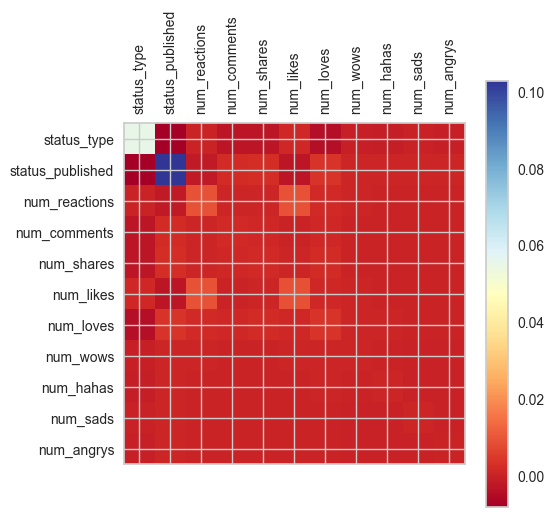

In [26]:
# Visualize the covariance matrix
plt.matshow(df_scaled.cov(), cmap=plt.cm.RdYlBu)
plt.xticks(range(len(df_scaled.columns)), df_scaled.columns, rotation=90)
plt.yticks(range(len(df_scaled.columns)), df_scaled.columns)
plt.colorbar()
plt.show()

Cause the dataframe is scaled with the MaxMinScaler the headmap don't tell us that much.

In [27]:
#Run dementionality reduction on the MaxMinScaled dataset
pca = PCA()
pca_transformed = pca.fit_transform(df_scaled)
df_pca=pd.DataFrame(pca_transformed, index=df_scaled.index)
df_pca.round(5)


,0,1,2,3,4,5,6,7,8,9,10
0,-0.28513,-0.22563,0.10560,0.06646,-0.02527,0.00590,-0.03162,-0.03315,-0.01548,-0.00319,-0.0
1,-0.22249,0.11607,-0.01977,-0.02506,-0.00117,-0.00248,0.00044,-0.00012,-0.00067,-0.00011,-0.0
2,-0.28040,-0.21414,0.00315,-0.02940,-0.00630,-0.00300,-0.00155,-0.00106,-0.00493,-0.00160,-0.0
3,-0.22254,0.11595,-0.03121,-0.02258,-0.00150,-0.00242,0.00059,-0.00011,-0.00065,-0.00013,-0.0
4,-0.22074,0.11478,-0.00041,-0.01874,-0.00558,-0.00235,-0.00437,-0.00145,-0.00214,-0.00606,-0.0
...,...,...,...,...,...,...,...,...,...,...,...
7045,0.03852,0.06920,-0.04450,-0.00804,-0.00206,-0.00181,0.00044,-0.00010,-0.00037,-0.00004,-0.0
7046,0.03786,0.06884,-0.06570,-0.00115,-0.00359,-0.00142,-0.00009,0.00519,-0.00300,0.00115,-0.0
7047,0.03847,0.06880,-0.06993,-0.00138,-0.00334,-0.00165,0.00026,-0.00021,-0.00049,-0.00075,-0.0
7048,0.04294,0.06862,0.03308,-0.01923,-0.00006,-0.00318,-0.00176,-0.00275,-0.00071,0.00382,-0.0


We see the components are no longer meaningful, and we can not interpret them as before.  

[5.59116490e-01 2.92082234e-01 1.02833913e-01 2.47456587e-02
 6.71038992e-03 4.72518418e-03 3.23942201e-03 2.55600507e-03
 2.44503048e-03 1.54567205e-03 8.19131222e-10]


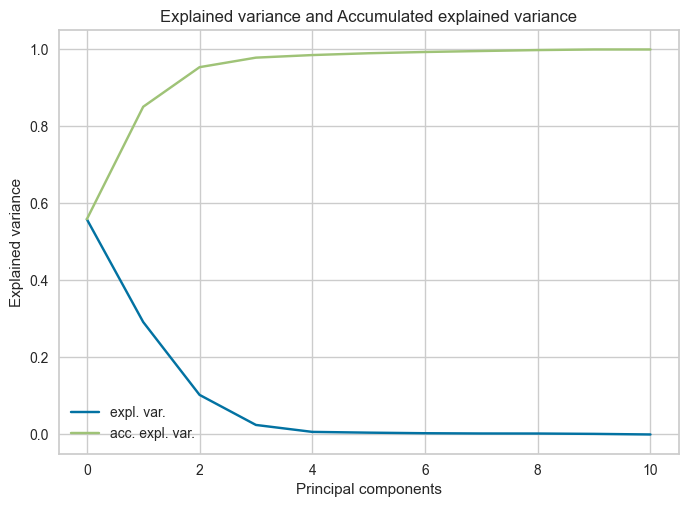

In [28]:
# Plot the explained variance graph
expl_var=pca.explained_variance_ratio_
print(expl_var)
plt.plot(expl_var, label='expl. var.')
plt.plot(np.add.accumulate(expl_var), label='acc. expl. var.')
plt.xlabel('Principal components')
plt.ylabel('Explained variance')
plt.title('Explained variance and Accumulated explained variance')
plt.legend()

The plot shows the amount of variance in the original data that is captured by each principal component.

We can see that the first 2 components explain already more than 80% of the variance.
And the first three components explain already more than 90% of the variance. 
To make keep it simpler, we keep only the first 2 components. 

Further, we can see that 9 of the components explain less than 20% of the variance. 

In [29]:
# Select the fist 2 components that explain already more than 80% of the variance by looking at variance graph above
model = PCA(n_components=2)
df_pca = model.fit_transform(df_scaled)
df_pca.shape

(7050, 2)

## Task 7 – Clustering II

Try again to find some strong structure with the two clustering methods that already been used above.

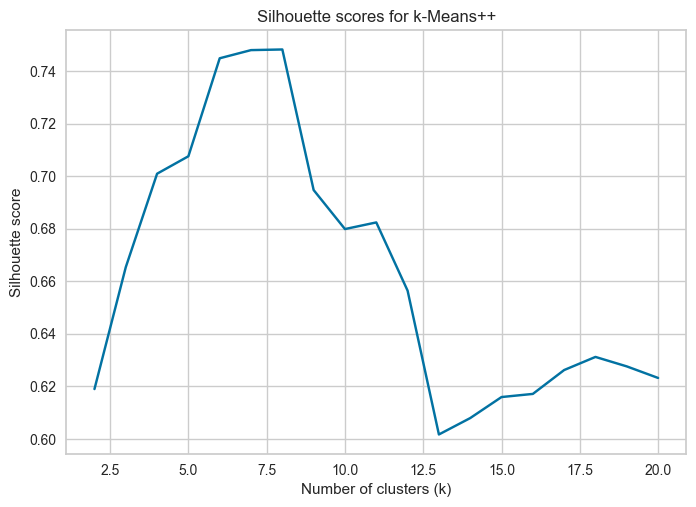

The largest silhouette score of 0.748 we get for K-means++ with k=8.


In [30]:
#Run k-Means on the PCA transformed dataset
fine_k_list = run_kmeans(df = df_pca, k_min=2,k_max=20)

In [31]:
# Print how many clusters have a silhouette score >= 0.7
print(f'We found {len(fine_k_list)} clusters with a silhouette score >= 0.7')

We found 5 clusters with a silhouette score >= 0.7


For 4 clusters the silhouette score is 0.701


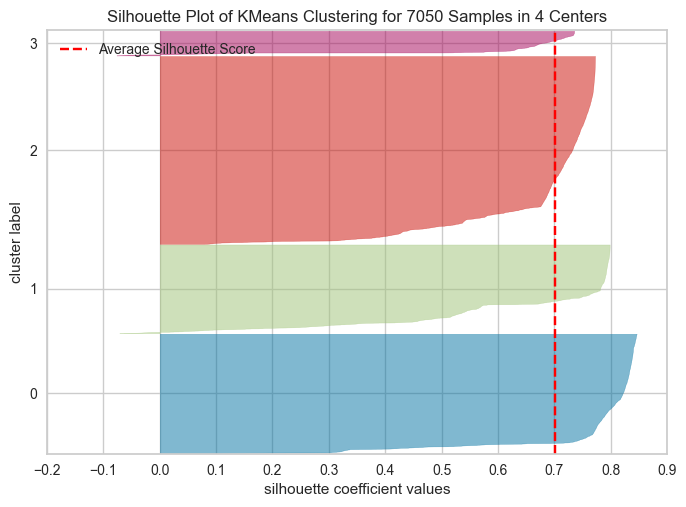

For 5 clusters the silhouette score is 0.708


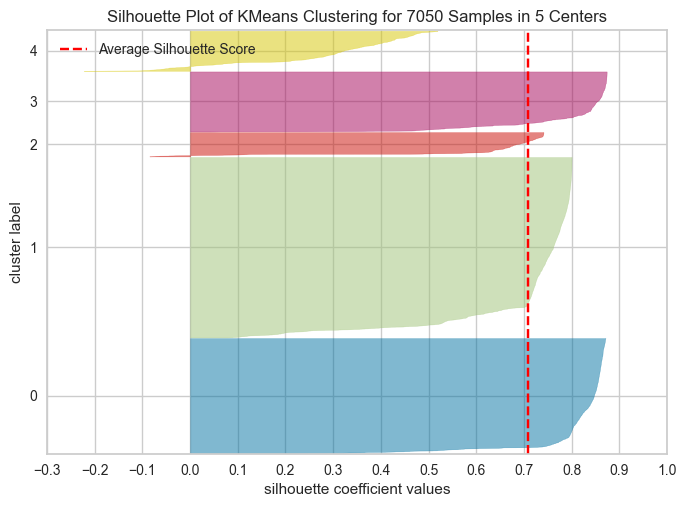

For 6 clusters the silhouette score is 0.745


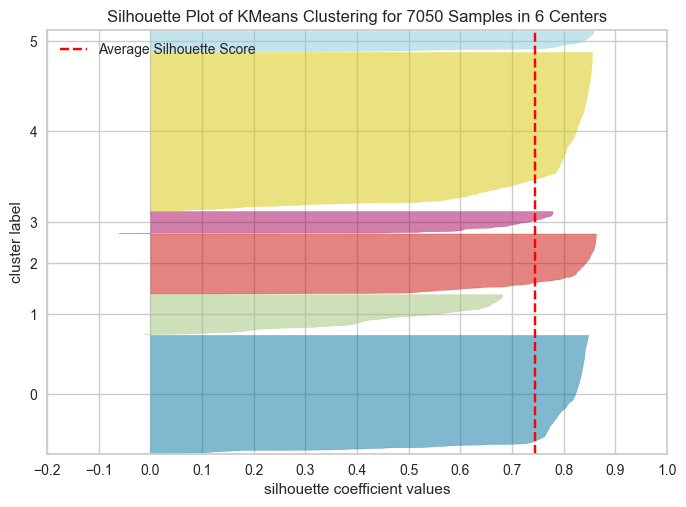

For 7 clusters the silhouette score is 0.748


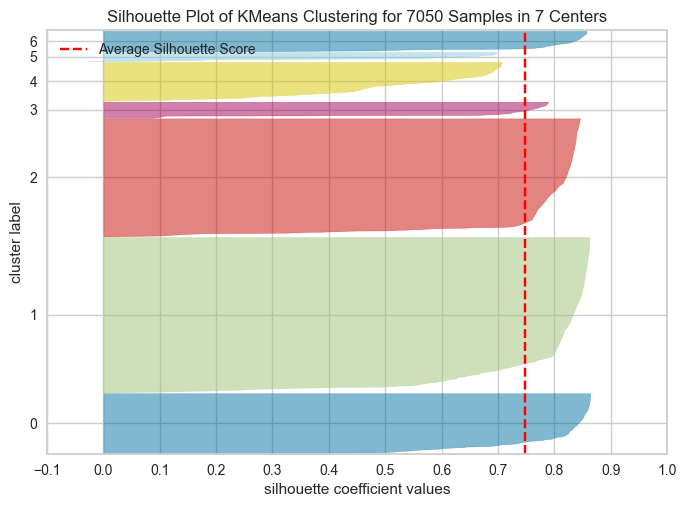

For 8 clusters the silhouette score is 0.748


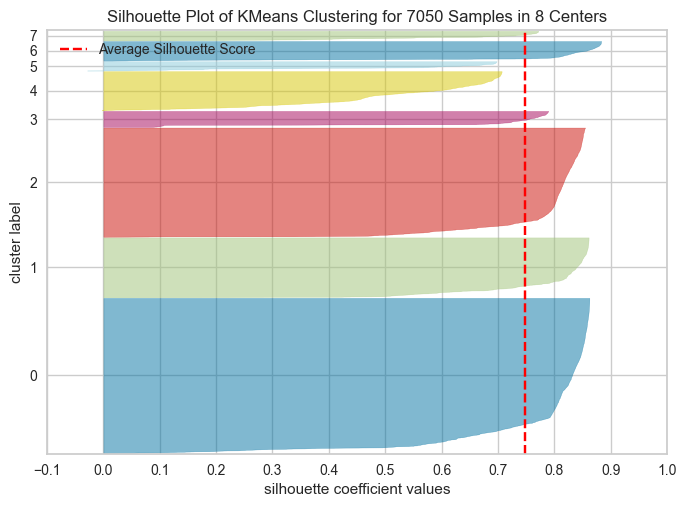

In [32]:
#Show silhouette plots for k-Means++ with silhouette score grather than 0.7
for k in fine_k_list:
    run_kmeans_plot(df = df_pca, k=k)

We found 5 different clusterings with a silhouette score >= 0.7.

The clustering with k=6, 7, 8 are more difficult to interpret, because of the number of clusters.

The cluster with k = 5 includes one cluster (cluster 4) with low silhouette values, what leads to the conclusion that this cluster is not that well separated from the other clusters.

The clusters we get for k = 4 looks more promising, because the clusters look well separated from each other and the silhouette values are high. But cluster 1 and 3 have some instances with low silhouette values. They ate just a few instances, so if I had to choose one of the 4 clusterings I would choose the one with k = 4. 

### DBSCAN

#### Find some 'good' values for DBSCAN 

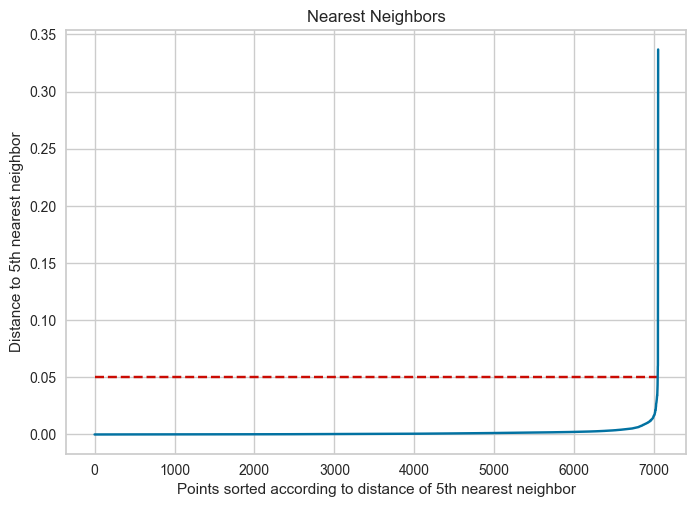

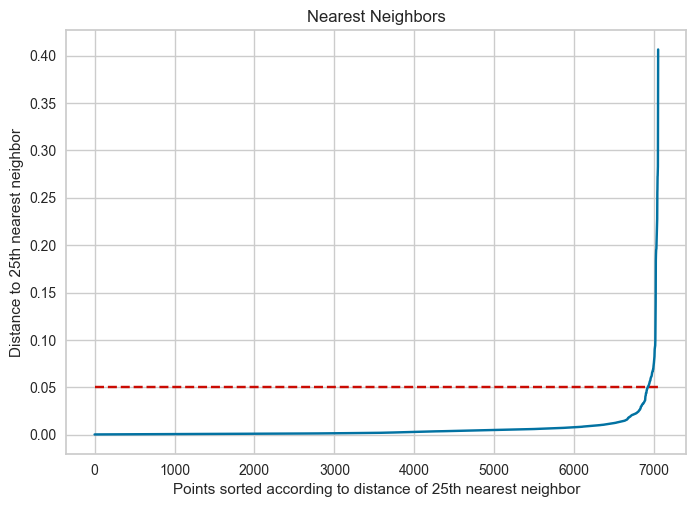

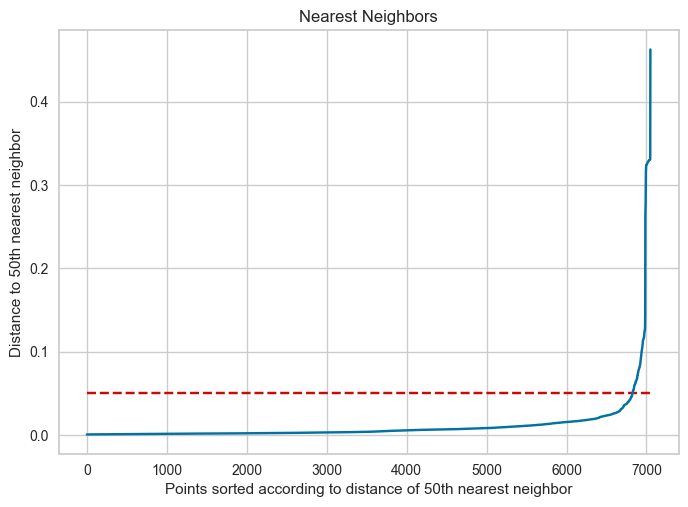

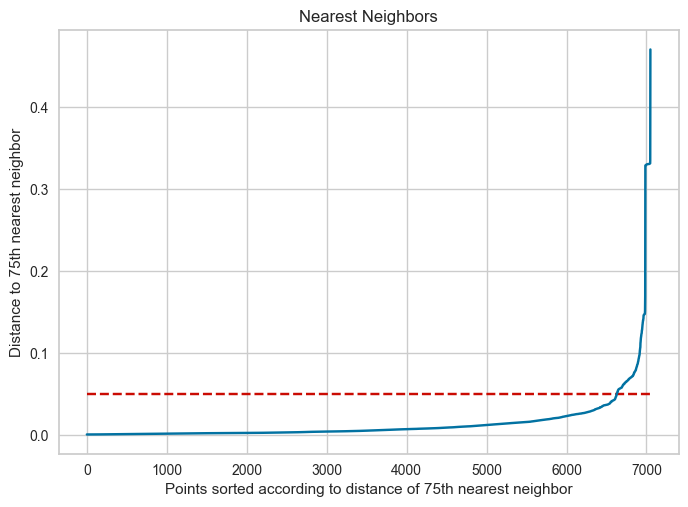

In [33]:
# Plot the distance matrix for different values of k
k_list = [5,25,50,75]
for k in k_list:  # Number of neighbors to consider
    compute_distance_matrix(df_pca,k,eps=0.05)

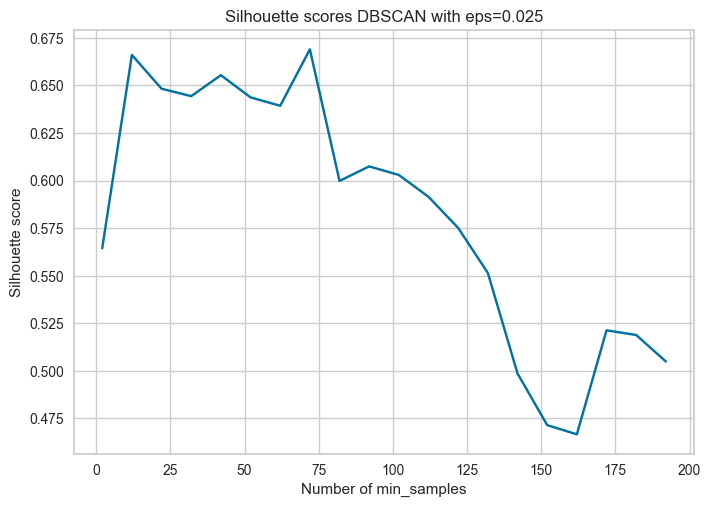

We found 0 clusters with a silhouette score >= 0.7, for eps = 0.025


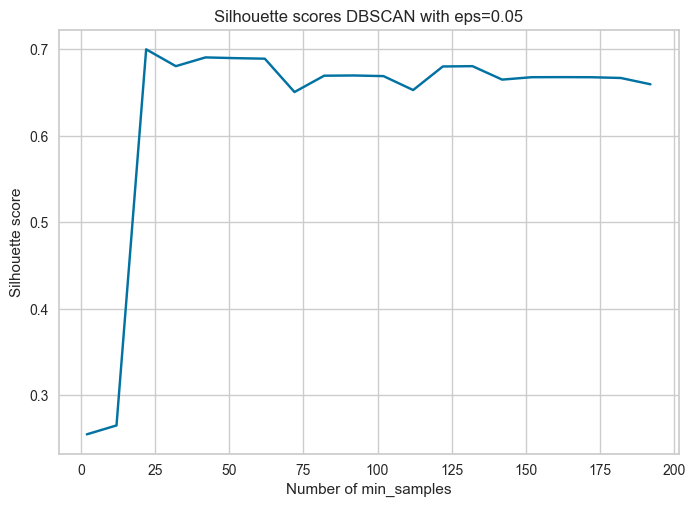

We found 1 clusters with a silhouette score >= 0.7, for eps = 0.05


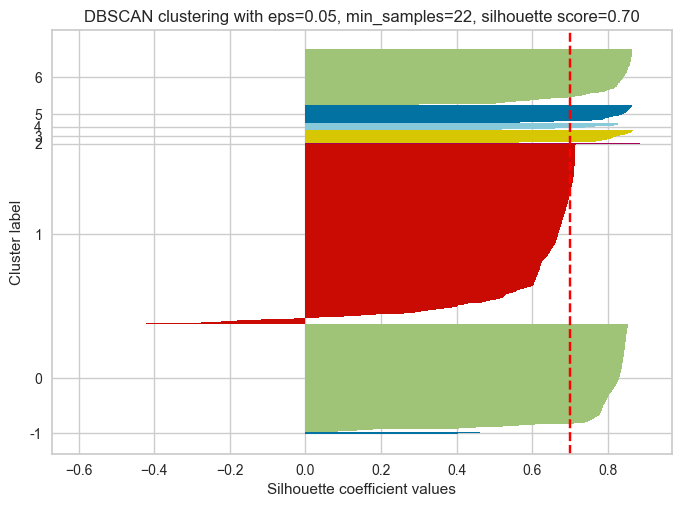

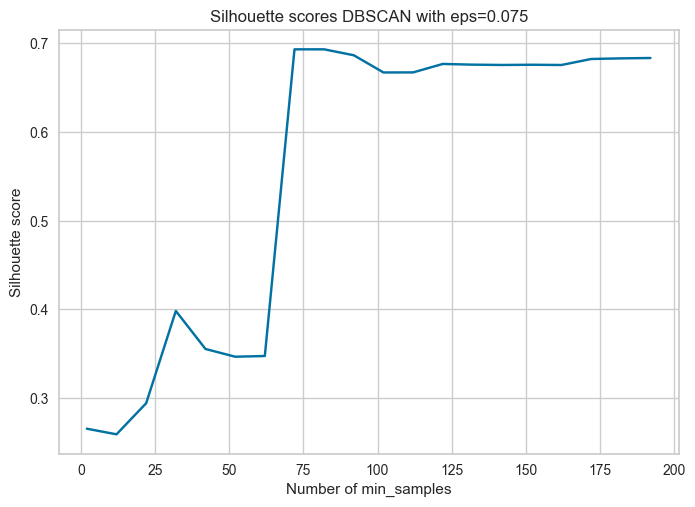

We found 0 clusters with a silhouette score >= 0.7, for eps = 0.075


In [34]:
# Try different epsilon values using the elbow method, by looking at the plots above
eps_list = [0.025,0.05,0.075]
for eps in eps_list:
    min_samples_values = range(2,200,10) # choose some values try values around 1% and 20% of the number of samples
    fine_min_samples_list = dbscan_silhouette_score_plot(df_pca,eps,min_samples_values)

    # Print how many clusters have a silhouette score >= 0.7
    print(f'We found {len(fine_min_samples_list)} clusters with a silhouette score >= 0.7, for eps = {eps}') 

    # Show silhouette plots for DBSCAN with silhouette score grather than 0.7
    for min_samples in fine_min_samples_list:
        dbscan_silhouette_plot(df_pca,eps,min_samples)


We found one clustering with a silhouette score >= 0.7, for eps = 0.05 and min_samples = 22

The clusters 2, 3, 4, 5 only have a few samples, so they are probably difficult to interpret. 


## Compare the results to those of Task 5.

Comparing the results of Task 5 we can see that we get higher silhouette scores after the dimensionality reduction.

When we get a maximum silhouette score around 0.6, we get a maximum silhouette score around 0.7 after dimensionality reduction.


### K-Means befor and after dimensionality reduction

Comparing the preferred choices of K-Means clustering bevor and after Dimensional Reduction:

Clustering with K-Means on the Dataframe before dimensional reduction transformation
For 3 clusters the silhouette score is 0.61


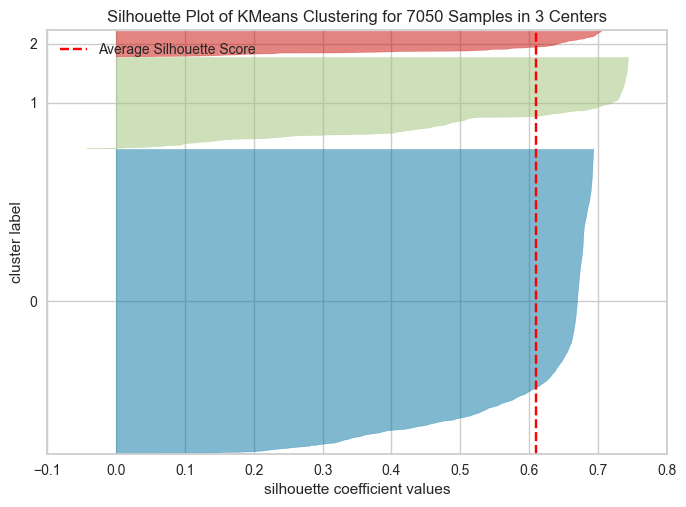

Clustering with K-Means on the Dataframe after dimensional reduction transformation
For 4 clusters the silhouette score is 0.701


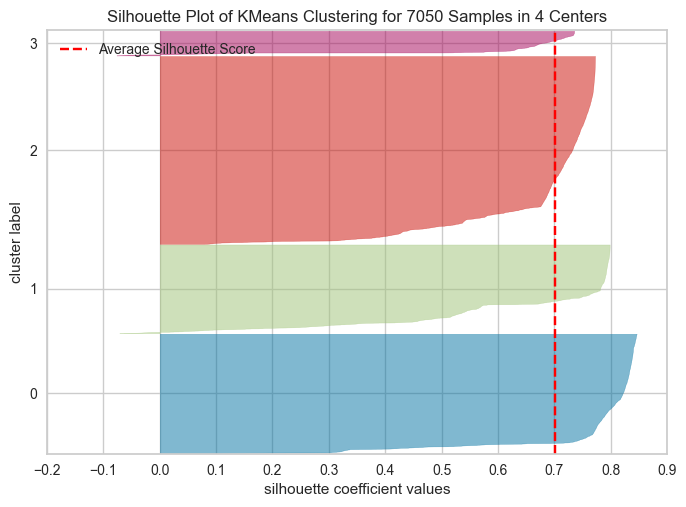

In [35]:
# Show the silhouette plots for K-means++ my preferd clusterings befor and after PCA transformation
print('Clustering with K-Means on the Dataframe before dimensional reduction transformation')
run_kmeans_plot(df = df_scaled, k=3)
print('Clustering with K-Means on the Dataframe after dimensional reduction transformation')
run_kmeans_plot(df = df_pca, k=4)


Comparing the results of the two clusterings, we can see that the clustering after PCA transformation got a higher silhouette score.

This means that the clustering structure after PCA transformation is stronger than the clustering before PCA transformation.

This is because the PCA transformation reduces the dimensionality of the dataset and therefore the noise in the dataset.

Both clusterings have one cluster with a small amount of samples compared to the other clusters. By looking at the silhouette plots, they look quite similar.

Also, both cluster 1 look quite similar on the silhouette plots.

The clusters 0 and 2 of the clustering after PCA transformation looks similar to the cluster 0 of the clustering before PCA transformation.


### DBSCAN befor and after Dimensionality Reduction

Comparing the preferred choices of DBSCAN clustering bevor and after Dimensional Reduction:

Clustering with DBSCAN on the Dataframe before dimensional reduction transformation:


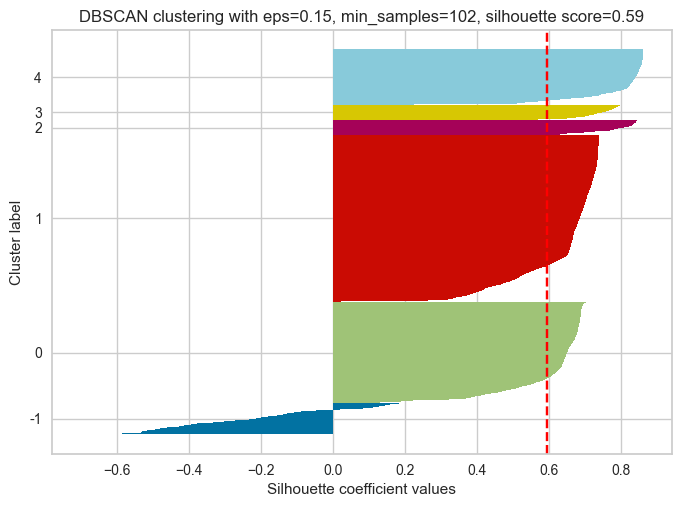

Clustering with DBSCAN on the Dataframe after dimensional reduction transformation:


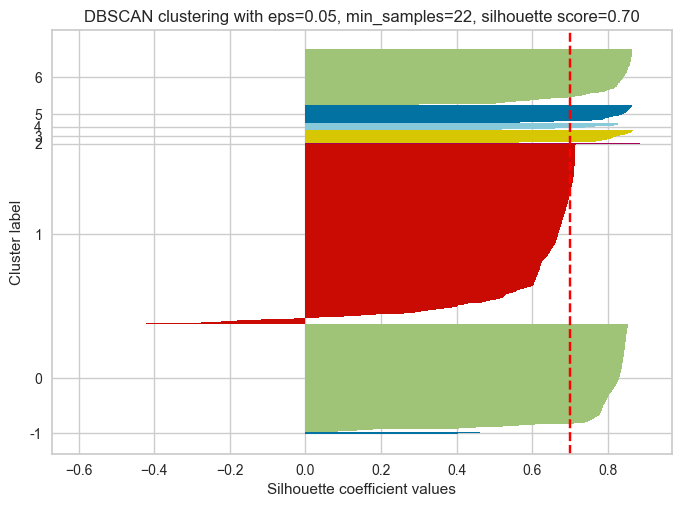

In [36]:
# Show the silhouette plots for K-means++ my preferd clusterings befor and after PCA transformation
print('Clustering with DBSCAN on the Dataframe before dimensional reduction transformation:')
dbscan_silhouette_plot(df_scaled,eps=0.15,min_samples=102)
print('Clustering with DBSCAN on the Dataframe after dimensional reduction transformation:')
dbscan_silhouette_plot(df_pca,eps=0.05,min_samples=22)


The DBSCAN clustering after dimensional leads to a higher silhouette score. Even if the silhouette score is higher, after dimensional reduction, would because the cluster 2 just have a small amount of instances. 

Additionally, it's difficult to interpret the clusters after dimensional reduction, because the features are not the same as in the original dataset. And a few instances in a cluster makes it even more difficult because they are not that significant than big clusters.

# Task 8 – Cluster Interpretation

#### Pick one of the clusterings

I pick the k-Means++ clustering with k=3 on the original dataset as my preferred clustering method, because the clusters are well separated and the silhouette score of 0.6 is not as good as the silhouette score after dimensional reduction, but it's still okay. 
And the clusters before dimensional reduction are way easier to interpret, then the clusters after dimensional reduction.



In [37]:
# Create a K-Means instance with 3 clusters
kmeans_pp = KMeans(
    n_clusters = 3,
    random_state = 3,
    n_init = 20,
    init='k-means++',
    max_iter = 300,
    tol = 0.0001
)
# Fit the model to the data
kmeans_pp.fit(df_scaled)



KMeans(n_clusters=3, n_init=20, random_state=3)

#### Look at the cluster centroids

In [38]:
# Store the cluster centroids
centroids = kmeans_pp.cluster_centers_

# unscale the centroids
centroids = max_min_scaler.inverse_transform(centroids)

df_centroids_k_mean = pd.DataFrame(centroids, columns = df_scaled.columns)

# Add cluster labels
df_centroids_k_mean['cluster'] = ['cluster 0', 'cluster 1', 'cluster 2']
df_centroids_k_mean.set_index('cluster', inplace=True)

#Convert unix time to datetime format dd/mm/yy hh:mm
df_centroids_k_mean['status_published'] = df_centroids_k_mean['status_published'].apply(lambda x: datetime.utcfromtimestamp(x).strftime('%d/%m/%Y %H:%M'))


# Count number of instances in each cluster
counts = {}
for label in np.unique(kmeans_pp.labels_):
    counts[label] = np.count_nonzero(kmeans_pp.labels_ == label)

# Create dataframe with cluster counts
df_counts = pd.DataFrame.from_dict(counts, orient='index', columns=['num_instances'])
df_counts.index = ['cluster {}'.format(i) for i in df_counts.index]

# Join df_counts with df_centroids_k_mean based on index (cluster labels)
df_centroids_k_mean = df_centroids_k_mean.join(df_counts)

# Sort the dataframe by cluster number
df_centroids_k_mean = df_centroids_k_mean.reindex(index=['cluster {}'.format(i) for i in range(kmeans_pp.n_clusters)])

#Round all values to 2 decimals
df_centroids_k_mean = df_centroids_k_mean.round(2)

# Highlight the maximum values in a green font and the minimum values in a red
display(df_centroids_k_mean.style.highlight_max(axis=0, color='green').highlight_min(axis=0, color='red'))

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,num_instances
cluster,,,,,,,,,,,,
cluster 0,0.610000,10/11/2017 12:44,167.330000,303.950000,54.410000,146.710000,17.500000,1.700000,0.960000,0.310000,0.150000,5093
cluster 1,0.780000,25/07/2013 13:25,383.440000,13.130000,2.520000,383.440000,-0.000000,-0.000000,0.000000,0.000000,0.000000,1530
cluster 2,2.850000,10/03/2017 23:13,429.600000,31.820000,2.840000,426.740000,1.380000,1.030000,0.100000,0.330000,0.020000,427



By looking at the centroids of the clusters, we can get an idea of the central tendency of the data points in each cluster.
The largest values in each column are highlighted in green. The lowest values in each column are highlighted in red. 

- Cluster 0:  
    It has the most instances of the three clusters. The average status type is 0.61, that MAY mean that most of the posts in cluster 0 are videos. To confirm this, we would need to look closer at the instances of cluster 0 and count the numbers of each status type. See the bar plot below.

    We remember that we assigned the number 0 to video, 1 to photo, 2 to link and 3 to status.

    The average date of publication of the post in cluster 0 is around Oktober 2017.

    The average number of reactions is 167 reactions per post in cluster 0. Which is the lowest average number of reactions of the three clusters.

    The average number of comments and shares per Post are the highest of the three clusters. 

    The post of cluster 0 received the fewer likes then the posts in the other clusters. 

    Even if the average number of reactions is the lowest, the number of loves, wows, hahas and anngrys are the highest of the three clusters.

- Cluster 1:
    The average status type is 0.78, that means that may most of the posts in cluster 1 are photos.

    The average number of reactions is 383 per post, and most of them are likes. Besides that the posts of cluster 1 have the smallest number of comments, shares, loves, wows, hahas, sads and anngrys.


- Cluster 2:
    The posts of cluster 2 have the highest average number of reactions. The average number of reactions is 429 and most of them are likes.
    The type of post is 2.85 which means that most of the posts in cluster 2 are status.


For all clusters we can see that the number of loves, wows, hahas and anngrys are just a small part of the total number of reactions.

That shows us that the people usually react with comments, shares and likes.

Also, we see that the kinds of posts of cluster 0 and 1 are similar, but the reactions are completely different. Videos and Photos posted around 2013 mostly generated like, but video and photo posts around 2017 generated a wide range of kinds of reactions. 



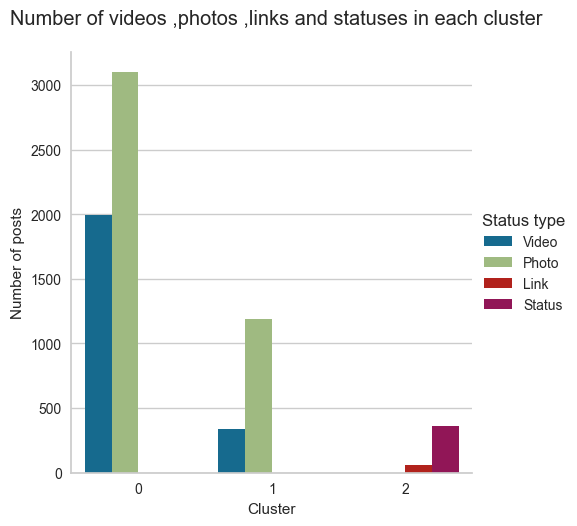

In [39]:
#Closer look at kind of posts in the clsters 
# Get number of video (0),photo (1),links (2) and status (3) in each cluster
#add column cluster to df
df['cluster_label'] = kmeans_pp.labels_

df_counts_statustype = df.groupby(['cluster_label', 'status_type']).size().reset_index(name='counts')
 
plot = sns.catplot(x="cluster_label", y="counts", hue="status_type", kind="bar", data=df_counts_statustype)
# Set title
plot.fig.suptitle('Number of videos ,photos ,links and statuses in each cluster', y=1.05)
# Set x-axis label
plot.set_xlabels("Cluster")
# Set y-axis label
plot.set_ylabels("Number of posts")
# Set legend title
plot._legend.set_title("Status type")
# Replace labels
new_labels = ['Video', 'Photo', 'Link', 'Status']
for t, l in zip(plot._legend.texts, new_labels): t.set_text(l)



We can see that the post of cluster 0 and 1 consist of videos and photos.
Cluster 2 consists of Links and Statuses.

In [40]:
# Create a parallel coordinates plot to visualize the cluster centroids
fig = go.Figure(data=
    go.Parcoords(
        line=dict(color=df['cluster_label'],
                  colorscale='Viridis',
                  showscale=True),
        dimensions=list([
            dict(range=[df['status_type'].min(), df['status_type'].max()],
                 label='Status Type', values=df['status_type']),
            dict(range=[df['status_published'].min(), df['status_published'].max()],
                 label='Status Published', values=df['status_published']),
            dict(range=[df['num_reactions'].min(), df['num_reactions'].max()],
                 label='Num Reactions', values=df['num_reactions']),
            dict(range=[df['num_comments'].min(), df['num_comments'].max()],
                 label='Num Comments', values=df['num_comments']),
            dict(range=[df['num_shares'].min(), df['num_shares'].max()],
                 label='Num Shares', values=df['num_shares']),
            dict(range=[df['num_likes'].min(), df['num_likes'].max()],
                 label='Num Likes', values=df['num_likes']),
            dict(range=[df['num_loves'].min(), df['num_loves'].max()],
                 label='Num Loves', values=df['num_loves']),
            dict(range=[df['num_wows'].min(), df['num_wows'].max()],
                 label='Num Wows', values=df['num_wows']),
            dict(range=[df['num_hahas'].min(), df['num_hahas'].max()],
                 label='Num Hahas', values=df['num_hahas']),
            dict(range=[df['num_sads'].min(), df['num_sads'].max()],
                 label='Num Sads', values=df['num_sads']),
            dict(range=[df['num_angrys'].min(), df['num_angrys'].max()],
                 label='Num Angrys', values=df['num_angrys'])
        ])
    )
)
# Set title
fig.update_layout(title_text="Parallel coordinates plot of cluster centroids")

fig.show()



Here we can see that the average number of comments and shares are higher in cluster 0 than in cluster 1 and 2.

Further, it's clearly visible that the most common type of reaction for cluster 1 and 2 are likes.

It's also visible that the wow, haha, sad and angry reactions are not that often used as the other reactions.
 

# Task 9 – Conclusions and Future Work

We have found 3 clusters that differ mainly in the type of posts, the number of reactions and the type of reaction. 

The original plan was to gain insights into which types of posts and engagement metrics are most effective for driving customer engagement for Thai fashion and cosmetics retail sellers.


I found out that posts of links and statuses generate the most reactions in form of likes.

Further the most comments and shares are generated with videos and photos.   

I would ask the marketing department if they know what kind of reaction is good to generate a wide range of followers/customers.

Let's say the facebook algorithm suggests post to new people if they have a lot of likes, then I would recommend the marketing department to set the focus on Links and statuses.

So the marketing and data science department need to exchange their knowledge to make decisions about further steps. 


### Propose ideas for future work: 
- Try not to spend too much time on fine-tuning and try to fulfill the minimum requirements of the task first and if there is still time, take care of the details 
- Try other cluster methods and maybe find stronger clusters.
